Libraries 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

Parameter definitions

In [2]:
def thresh_bw_image(img_path:str):
    """ 
    parameter:
    image(String) = path to image file (png, jpeg)

    return:
    bw_image(cv2.image_array/numpy_image_array)
    """
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = image.copy()
    # img = cv2.medianBlur(img,5)
    img = cv2.GaussianBlur(img,(5, 5), 0)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, bw_image = cv2.threshold(img_gray, int(img_gray.mean()), img_gray.max(), 0)
    return bw_image,img_gray

def save_csv(center_dict:dict,csv_path:str):
    """_summary_

    Parameters
    ----------
    center_dict : dict
        _description_
    imags_path : str
        _description_
    """
    with open(csv_path, 'w', newline='') as f:
        # Create a CSV writer object
        writer = csv.writer(f)
        for row in center_dict.items():
            writer.writerow(row)    

In [4]:
# imags_path = "cropped/"
# list_imgs_ = os.listdir(imags_path)
# list_imgs = sorted(list_imgs_)
# print(list_imgs[:10])

Directory, Test gray scale image detection

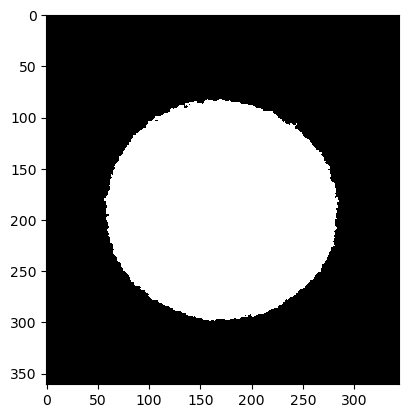

In [4]:
imags_path = r'C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Codes\Repository for data and scripts\Glenn\Github\Master_thesis\Data\First_field_data\cropped'
list_imgs_ = os.listdir(imags_path)
list_imgs = sorted(list_imgs_)
n = 77

image_test = cv2.imread(os.path.join(imags_path,list_imgs[n]),cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, int(img_gray.mean()), img_gray.max(), 0)
edges = cv2.Canny(thresh,100,200)
plt.imshow(thresh,cmap="gray")
plt.show()

Random selection of Images for test detections: Canny Edge



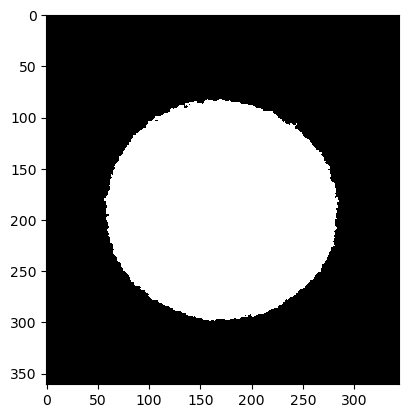

In [5]:
list_imgs_= os.listdir(imags_path)
list_imgs = sorted(list_imgs_)
n = -4

image_test = cv2.imread(os.path.join(imags_path,list_imgs[n]),cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, int(img_gray.mean()), img_gray.max(), 0)
edges = cv2.Canny(thresh,100,200)
plt.imshow(thresh,cmap="gray")
plt.show()

- select an image at random and plot raw image against the detected canny edge

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

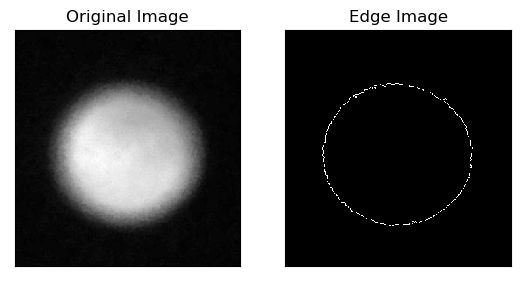

In [6]:
plt.subplot(121),plt.imshow(img_gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

Test draw box aeound detected contour

Bounding Box center:  (171.5, 191.5)


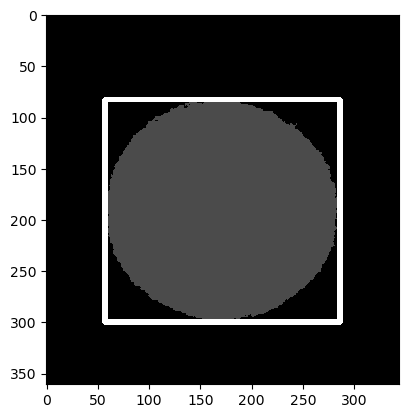

In [7]:
thresh = thresh.copy()
contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
sorted_areas = np.sort(areas)

cnt=contours[areas.index(sorted_areas[-1])] #the biggest contour
r = cv2.boundingRect(cnt)
print("Bounding Box center: ", (r[0]+0.5*r[2], r[1]+0.5*r[3]))

cv2.rectangle(thresh,(r[0],r[1]),(r[0]+r[2],r[1]+r[3]),(255,255,255),3)
plt.imshow(thresh, cmap="gray")
plt.show()

Contouring and canny edge detection

Center of Circle:  (170, 192)


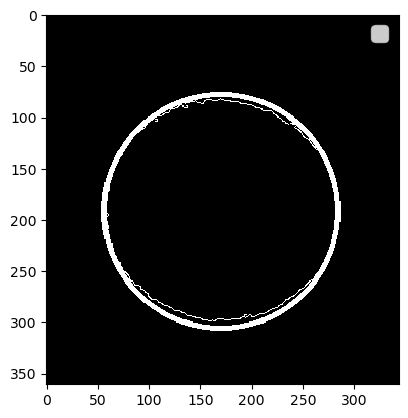

In [8]:
contours,_ = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
sorted_areas = np.sort(areas)

(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
print("Center of Circle: ",center)
radius = int(radius)
cv2.circle(edges,center,radius,(255,255,255),3)
plt.imshow(edges,cmap="gray")
plt.legend("Radius = {}pix".format(radius),fontsize=20,prop={'size': 15})
plt.show()

In [10]:
# # Fitting circles using Canny edge detection images as input
img_row = int(len(list_imgs)/5)
# img_cols = 5
# # Load image 
# n = 0

# f, axarr = plt.subplots(img_row,img_cols,figsize=(15, img_cols*10))
# center_dict_ced = {}

# for i in range(len(list_imgs)):
#     bw_img, img_gray = thresh_bw_image(os.path.join(imags_path,list_imgs[n+i]))
#     edges = cv2.Canny(bw_img,100,200)
#     contours,_ = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#     areas = [cv2.contourArea(c) for c in contours]
#     sorted_areas = np.sort(areas)
#     cnt=contours[areas.index(sorted_areas[-1])] #the biggest contour

#     (x,y),radius = cv2.minEnclosingCircle(cnt)
#     center = (int(x),int(y))
#     # print("Center of Circle: ",center)
#     radius = int(radius)
#     cv2.circle(edges,center,radius,(255,255,255),3)
#     center_dict_ced[list_imgs[n+i]] = center


#     axarr[i%img_row,i%img_cols].imshow(edges,cmap="gray")
            

#     axarr[i%img_row,i%img_cols].axis("off")
#     axarr[i%img_row,i%img_cols].set_title("Center of Circle: {}".format(center))

In [11]:
#print(img_row)

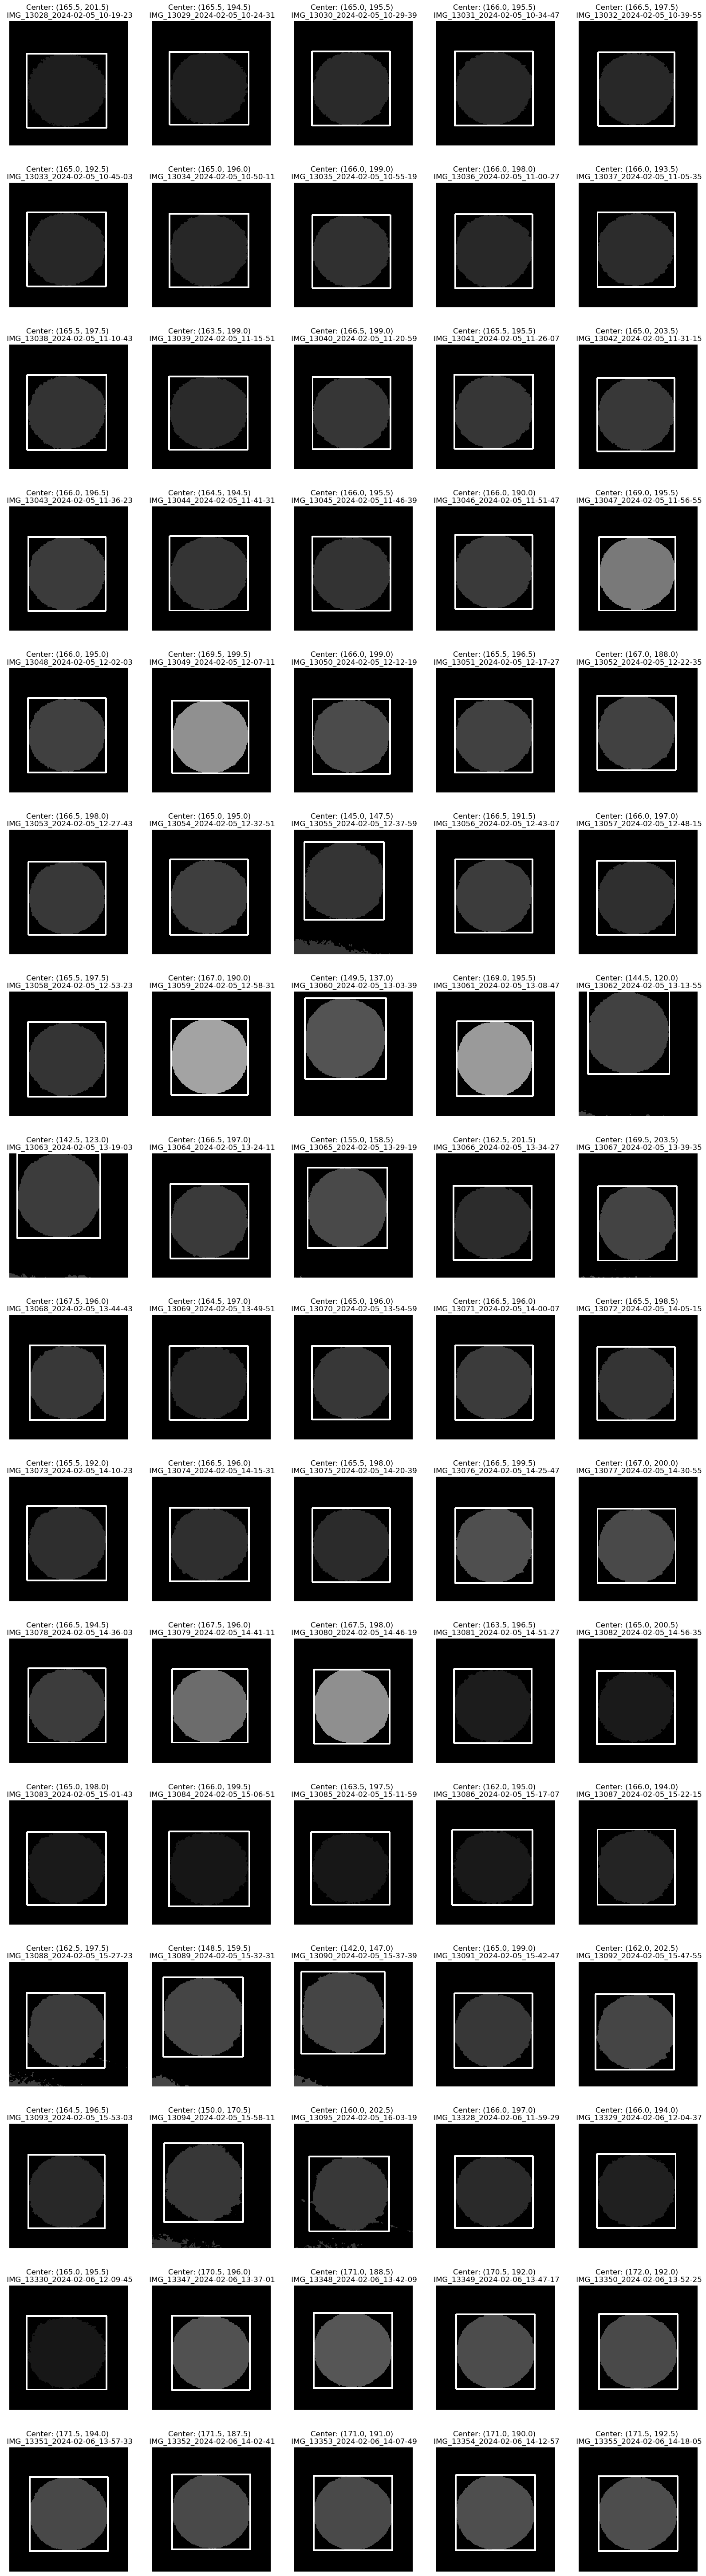

In [9]:
# Bounding box using Black&White images as input
img_row = int(len(list_imgs)/5)
img_cols = 5
# Load image 
n = 0
center_bb_dect = {}

f, axarr = plt.subplots(img_row,img_cols,figsize=(20, img_cols*15))
# axarr = np.array(axarr)

for i, ax in zip(range(len(list_imgs)),axarr.flat):
    bw_img, img_gray = thresh_bw_image(os.path.join(imags_path,list_imgs[n+i]))
    contours,_ = cv2.findContours(bw_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    sorted_areas = np.sort(areas)

    cnt=contours[areas.index(sorted_areas[-1])] #the biggest contour
    r = cv2.boundingRect(cnt)
    center = (r[0]+0.5*r[2], r[1]+0.5*r[3])
    # print("Bounding Box center: ", (r[0]+0.5*r[2], r[1]+0.5*r[3]))
    cv2.rectangle(bw_img,(r[0],r[1]),(r[0]+r[2],r[1]+r[3]),(255,255,255),3)
    center_bb_dect[list_imgs[n+i]] = center

    # axarr[i%img_row,i%img_cols].imshow(bw_img,cmap="gray")
            

    # axarr[i%img_row,i%img_cols].axis("off")
    # axarr[i%img_row,i%img_cols].set_title("Center: {} \n {}" .format(center,list_imgs[n+i].split(".")[0]))
    # ax = plt.subplot(img_row, img_cols, i + 1)
    ax.imshow(bw_img,cmap="gray")
            

    ax.axis("off")
    ax.set_title("Center: {} \n {}" .format(center,list_imgs[n+i].split(".")[0]))

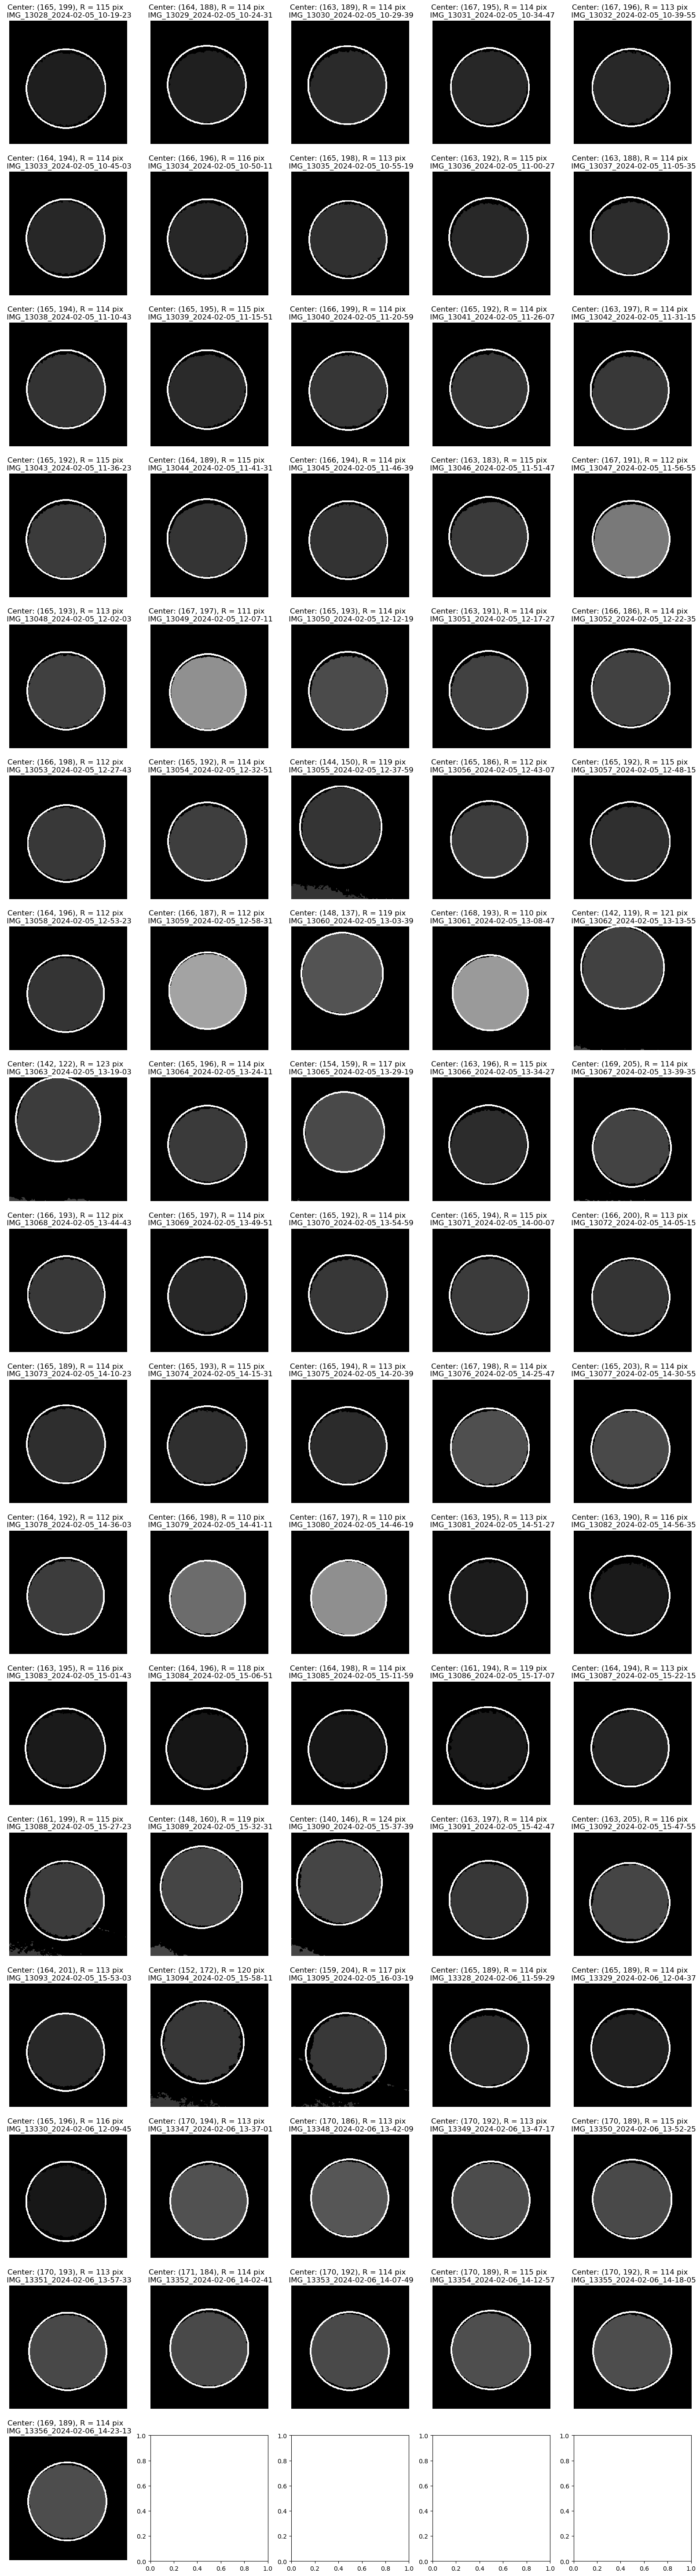

In [10]:
# Fitting circles using Black&White images as input
img_row = int(len(list_imgs)/5)+1
img_cols = 5
# Load image 
n = 0
center_fix_circle = {}
radius_fix_circle = np.ones((len(list_imgs),1))

f, axarr = plt.subplots(img_row,img_cols,figsize=(20, img_cols*15))

for i, ax in zip(range(len(list_imgs)),axarr.flat):
    bw_img, img_gray = thresh_bw_image(os.path.join(imags_path,list_imgs[n+i]))
    contours,_ = cv2.findContours(bw_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    areas = [cv2.contourArea(c) for c in contours]
    sorted_areas = np.sort(areas)
    cnt=contours[areas.index(sorted_areas[-1])] #the biggest contour

    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x),int(y))
    # print("Center of Circle: ",center)
    radius = int(radius)
    cv2.circle(bw_img,center,radius,(255,255,255),3)
    center_fix_circle[list_imgs[n+i]] = center
    radius_fix_circle[n+i] = radius

    ax.imshow(bw_img,cmap="gray")
            

    ax.axis("off")
    # axarr[i%img_row,i%img_cols].legend("Radius = {}pix".format(radius))
    ax.set_title("Center: {}, R = {} pix  \n {}" .format(center,radius,list_imgs[n+i].split(".")[0]))

In [11]:
# save_csv(center_dict_ced,"Canny_edge_center.csv")
#save_csv(center_bb_dect,"Bounding_box_center1.csv")
#save_csv(center_fix_circle,"Fit_circle_center2.csv")

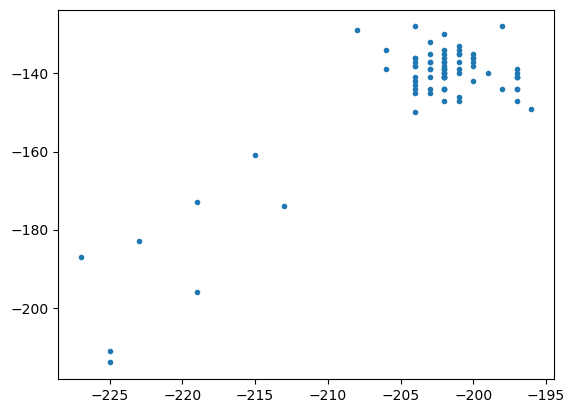

In [12]:
a = list(center_fix_circle.values())
centers_xy = np.array(a, dtype=object)


plt.plot(centers_xy[:,0]-367,centers_xy[:,1]-333,'.')
plt.show()

In [13]:
# Time series analysis

a = list(center_fix_circle.values())
centers_xy = np.array(a, dtype=object)
x_center = centers_xy[:,0].reshape(-1,1)
y_center = centers_xy[:,1].reshape(-1,1)

dx = np.ediff1d(x_center).reshape(-1,1)
dy = np.ediff1d(y_center).reshape(-1,1)


center_xy_dxdy = np.concatenate((x_center[1:],y_center[1:],dx,dy),axis=1)

Detecting the circles around the original image

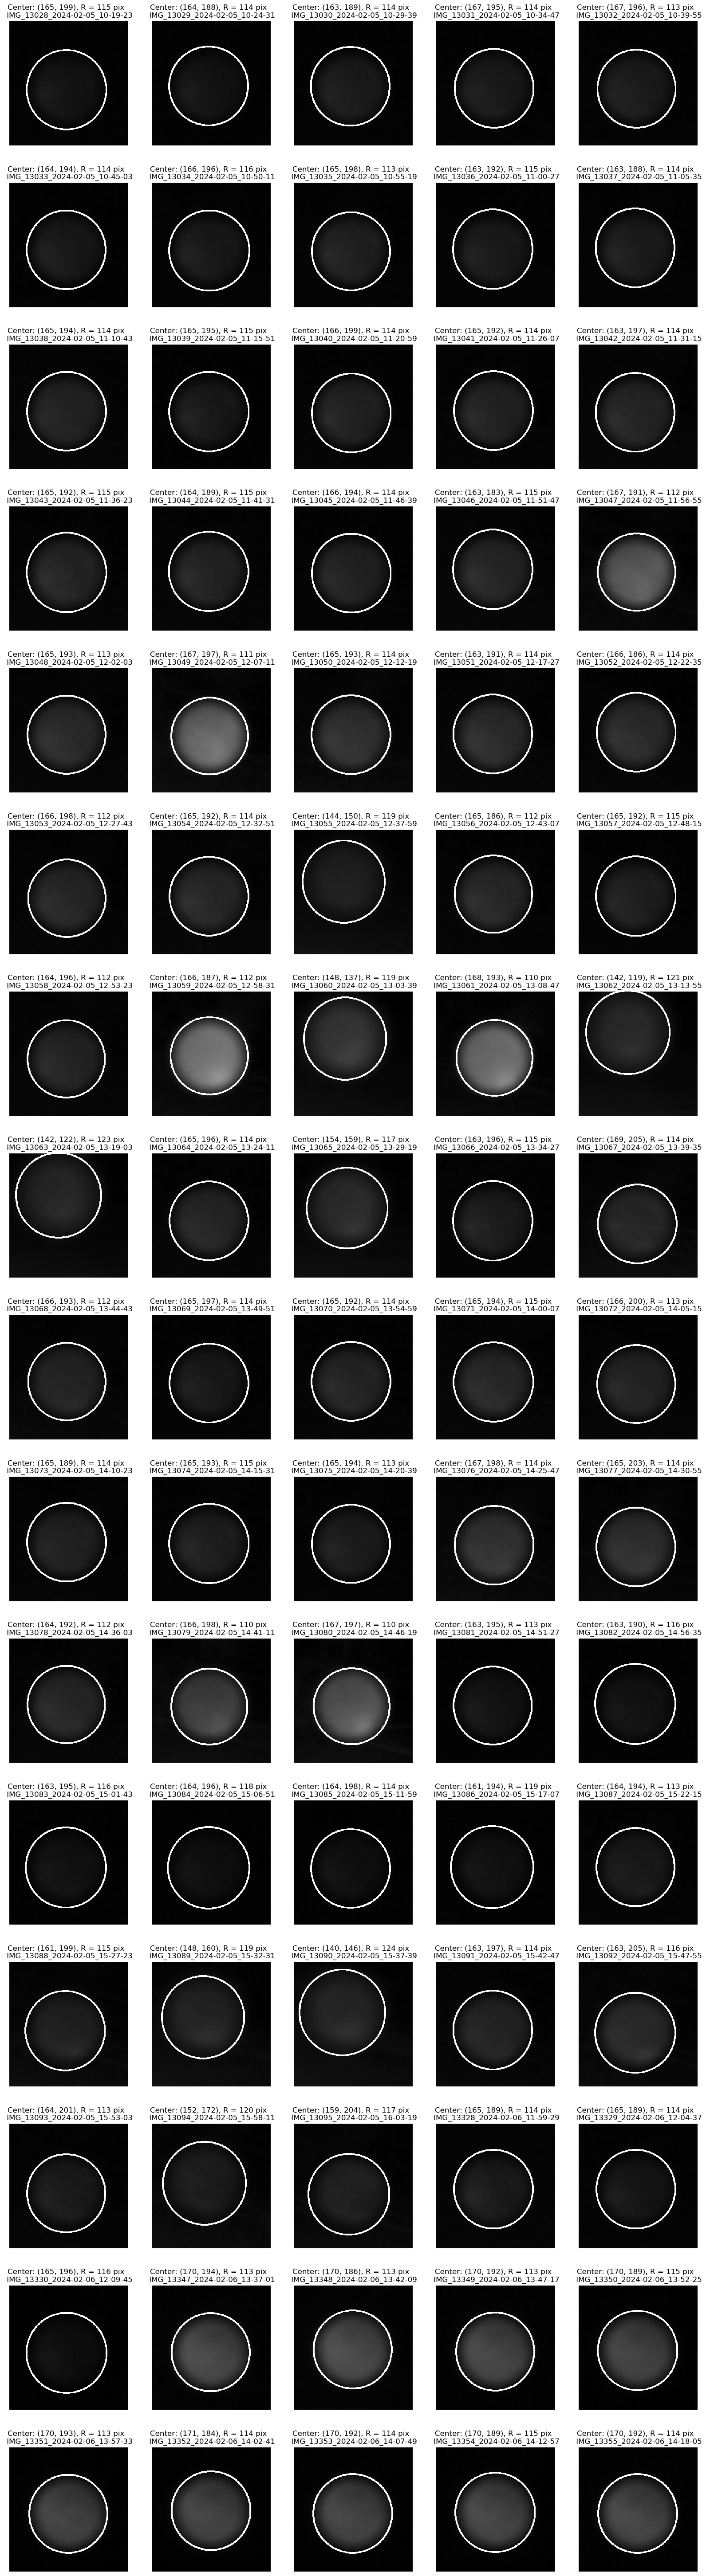

In [14]:
# Fitting circles using Black&White images as input
img_row = int(len(list_imgs)/5)
img_cols = 5
# Load image 
n = 0
center_fix_circle = {}
radius_fix_circle = np.ones((len(list_imgs),1))

f, axarr = plt.subplots(img_row,img_cols,figsize=(20, img_cols*15))

for i, ax in zip(range(len(list_imgs)),axarr.flat):
    bw_img, img_gray = thresh_bw_image(os.path.join(imags_path,list_imgs[n+i]))
    contours,_ = cv2.findContours(bw_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    areas = [cv2.contourArea(c) for c in contours]
    sorted_areas = np.sort(areas)
    cnt=contours[areas.index(sorted_areas[-1])] #the biggest contour

    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x),int(y))
    # print("Center of Circle: ",center)
    radius = int(radius)
    cv2.circle(img_gray,center,radius,(255,255,255),3)
    center_fix_circle[list_imgs[n+i]] = center
    radius_fix_circle[n+i] = radius

    ax.imshow(img_gray,cmap="gray")
            

    ax.axis("off")
    # axarr[i%img_row,i%img_cols].legend("Radius = {}pix".format(radius))
    ax.set_title("Center: {}, R = {} pix  \n {}" .format(center,radius,list_imgs[n+i].split(".")[0]))

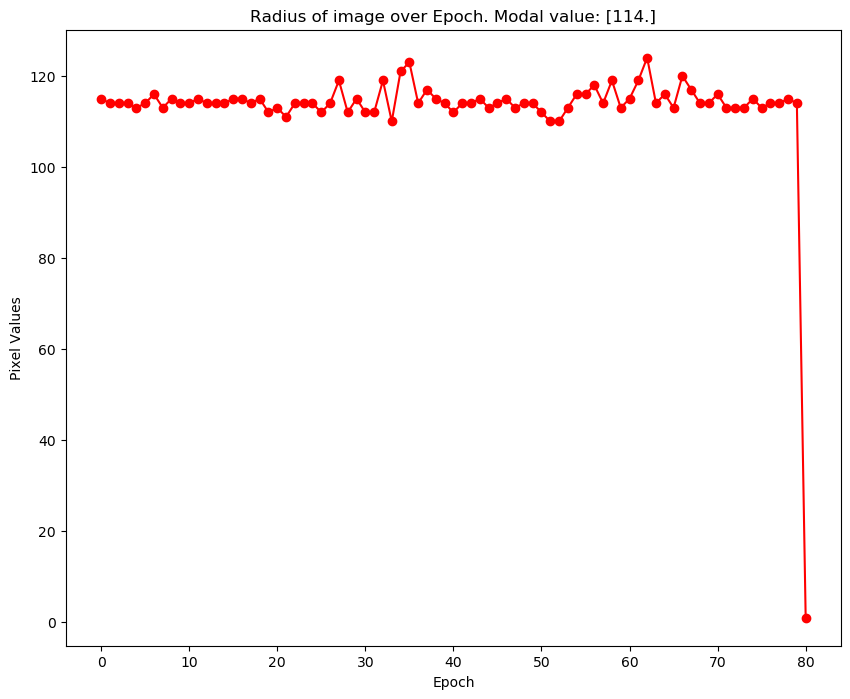

In [15]:
from scipy import stats
mode_val = stats.mode(radius_fix_circle, axis=None)

plt.figure(figsize=(10,8))
plt.plot(radius_fix_circle,'o-r')
plt.title("Radius of image over Epoch. Modal value: {}".format(mode_val[0]))
plt.ylabel("Pixel Values")
plt.xlabel("Epoch")
plt.show()

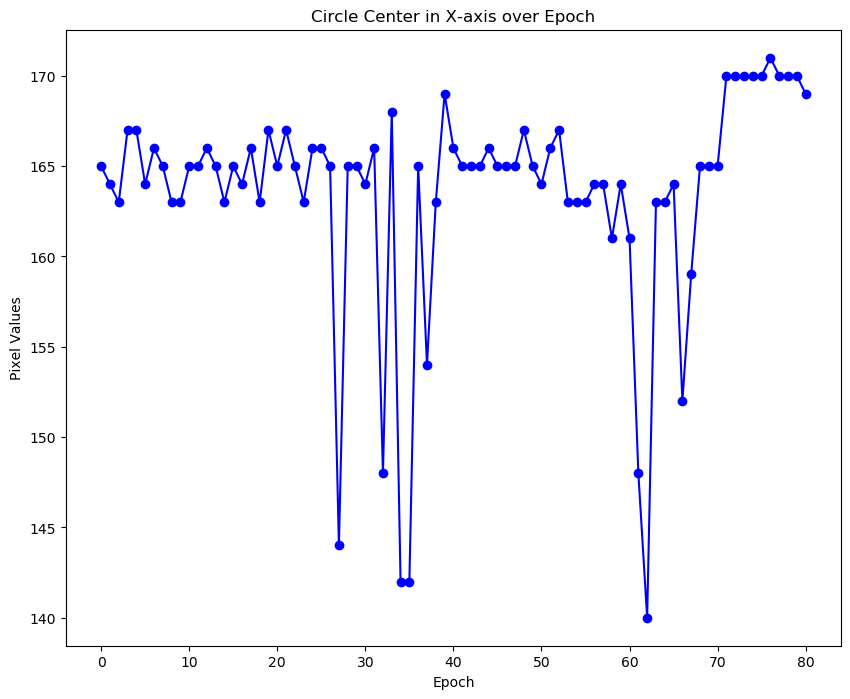

In [16]:
plt.figure(figsize=(10,8))
plt.plot(centers_xy[:,0],'o-b')
plt.title("Circle Center in X-axis over Epoch")
plt.ylabel("Pixel Values")
plt.xlabel("Epoch")
plt.show()

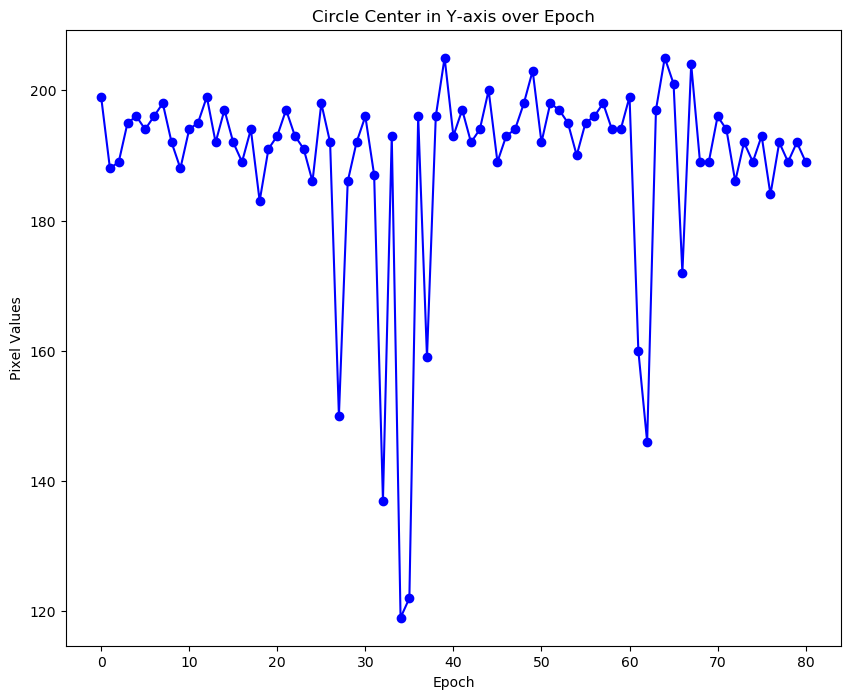

In [17]:
plt.figure(figsize=(10,8))
plt.plot(centers_xy[:,1],'o-b')
plt.title("Circle Center in Y-axis over Epoch")
plt.ylabel("Pixel Values")
plt.xlabel("Epoch")
plt.show()

In [18]:
# the modal here is the ´most recurring radius value in pixel. With the consistency, it is set is set as the base 
# the conversion.
ratio = (99.6799+99.6363)*0.25 / mode_val[0]
ratio

array([0.43709693])

In [19]:
mode_val[0]

array([114.])

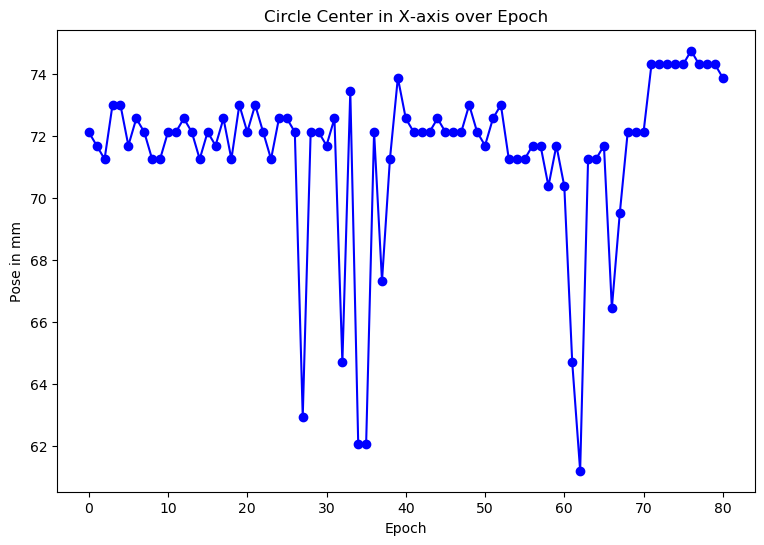

In [20]:
plt.figure(figsize=(9,6))
plt.plot(centers_xy[:,0]*ratio,'o-b')
plt.title("Circle Center in X-axis over Epoch")
plt.ylabel("Pose in mm")
plt.xlabel("Epoch")
plt.show()

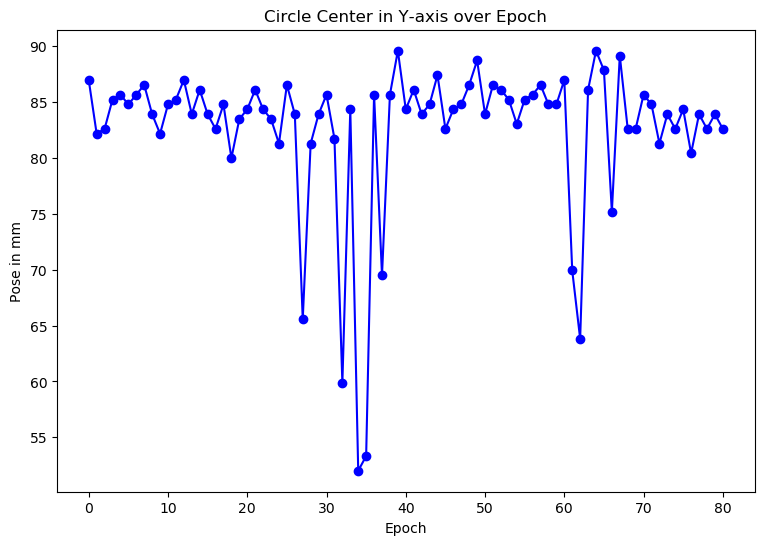

In [21]:
plt.figure(figsize=(9,6))
plt.plot(centers_xy[:,1]*ratio,'o-b')
plt.title("Circle Center in Y-axis over Epoch")
plt.ylabel("Pose in mm")
plt.xlabel("Epoch")
plt.show()

In [22]:
x_center = centers_xy[:,0].reshape(-1,1)
y_center = centers_xy[:,1].reshape(-1,1)
dx = np.ediff1d(x_center).reshape(-1,1)
dy = np.ediff1d(y_center).reshape(-1,1)

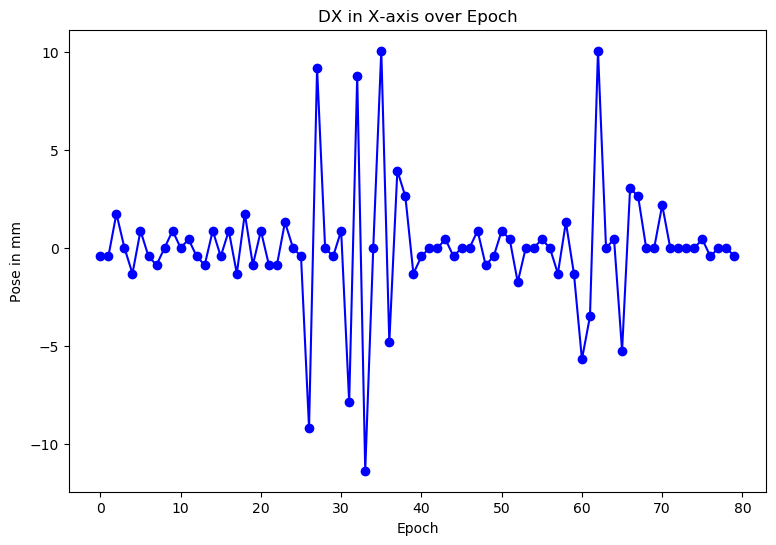

In [23]:
plt.figure(figsize=(9,6))
plt.plot(dx*ratio,'o-b')
plt.title("DX in X-axis over Epoch")
plt.ylabel("Pose in mm")
plt.xlabel("Epoch")
plt.show()

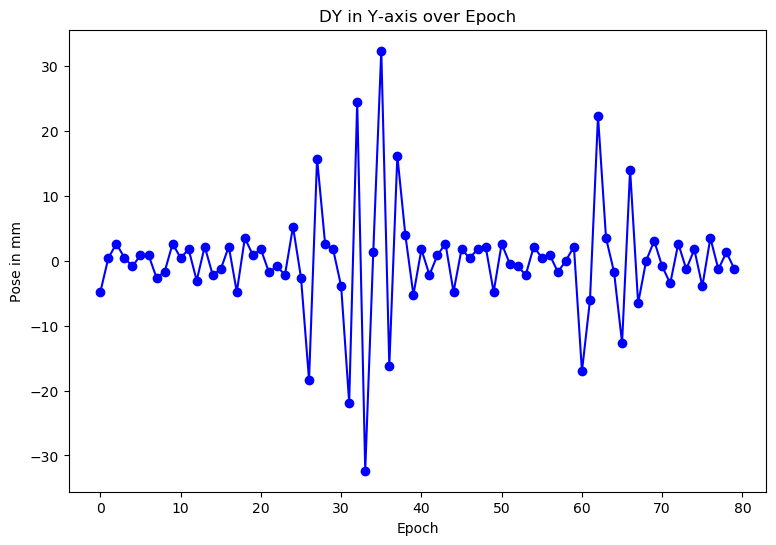

In [24]:
plt.figure(figsize=(9,6))
plt.plot(dy*ratio,'o-b')
plt.title("DY in Y-axis over Epoch")
plt.ylabel("Pose in mm")
plt.xlabel("Epoch")
plt.show()

In [27]:
list_imgs[0][10:29]

'2024-02-05_10-19-23'